In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Hugo's Portfolio/Introducing NBEATSx to Realized Volatility Forecasting (Research)/DJIA Realized Volatility.xlsx",index_col='Date',parse_dates=True)




In [ ]:
df = pd.read_excel("DJIA Realized Volatility.xlsx",index_col='Date',parse_dates=True)



Hyperparameter Search

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
scaler = MinMaxScaler()

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

In [ ]:
from numpy.random import seed
seed(1052023)
from random import randrange

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
3256/3256 [==============================] - 37s 9ms/step - loss: 0.0312 - acc: 3.0713e-04
Epoch 2/3
3256/3256 [==============================] - 30s 9ms/step - loss: 0.0306 - acc: 3.0713e-04
Epoch 3/3
1/1 [==============================] - 0s 30ms/step
Epoch: 3 | Inputs: 252 | Nodes: 42 | Dropout: 0 | Loss: mae
RMSE: 0.0022203426091903624 | Accuracy: 68.34645059462751
Epoch 1/3
3319/3319 [==============================] - 31s 8ms/step - loss: 0.0029 - acc: 3.0130e-04
Epoch 2/3
3319/3319 [==============================] - 28s 8ms/step - loss: 0.0029 - acc: 3.0130e-04
Epoch 3/3
1/1 [==============================] - 0s 21ms/step
Epoch: 3 | Inputs: 189 | Nodes: 84 | Dropout: 0.4 | Loss: mse
RMSE: 0.0021769891231837313 | Accuracy: 67.35448891054813
1/1 [==============================] - 0s 33ms/step
Epoch: 1 | Inputs: 84 | Nodes: 14 | Dropout: 0.4 | Loss: huber_loss
RMSE: 0.00214918259703551 | Accuracy: 65.71383553802363
1/1 [==============================] - 0s 21ms/step
Epoch:

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

1/1 [==============================] - 0s 18ms/step
Epoch: 1 | Inputs: 63 | Nodes: 14 | Dropout: 0 | Loss: huber_loss
RMSE: 0.0023936974251613677 | Accuracy: 65.54579131250362
Epoch 1/5
3319/3319 [==============================] - 32s 9ms/step - loss: 0.0027 - acc: 6.0259e-04
Epoch 2/5
3319/3319 [==============================] - 29s 9ms/step - loss: 0.0027 - acc: 3.0130e-04
Epoch 3/5
3319/3319 [==============================] - 29s 9ms/step - loss: 0.0027 - acc: 6.0259e-04
Epoch 4/5
3319/3319 [==============================] - 29s 9ms/step - loss: 0.0026 - acc: 3.0130e-04
Epoch 5/5
1/1 [==============================] - 0s 31ms/step
Epoch: 5 | Inputs: 189 | Nodes: 84 | Dropout: 0.2 | Loss: mse
RMSE: 0.0020368311065646423 | Accuracy: 68.13181075385116
Epoch 1/3
3445/3445 [==============================] - 25s 7ms/step - loss: 0.0013 - acc: 5.8055e-04
Epoch 2/3
3445/3445 [==============================] - 24s 7ms/step - loss: 0.0013 - acc: 2.9028e-04
Epoch 3/3
1/1 [=====================

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/7
3382/3382 [==============================] - 31s 8ms/step - loss: 0.0024 - acc: 5.9137e-04
Epoch 2/7
3382/3382 [==============================] - 24s 7ms/step - loss: 0.0024 - acc: 5.9137e-04
Epoch 3/7
3382/3382 [==============================] - 24s 7ms/step - loss: 0.0024 - acc: 2.9568e-04
Epoch 4/7
3382/3382 [==============================] - 24s 7ms/step - loss: 0.0024 - acc: 2.9568e-04
Epoch 5/7
3382/3382 [==============================] - 24s 7ms/step - loss: 0.0024 - acc: 2.9568e-04
Epoch 6/7
3382/3382 [==============================] - 24s 7ms/step - loss: 0.0024 - acc: 2.9568e-04
Epoch 7/7
1/1 [==============================] - 0s 20ms/step
Epoch: 7 | Inputs: 126 | Nodes: 126 | Dropout: 0 | Loss: mse
RMSE: 0.0019668839751324062 | Accuracy: 69.18432067508091
1/1 [==============================] - 0s 19ms/step
Epoch: 1 | Inputs: 63 | Nodes: 14 | Dropout: 0.2 | Loss: mse
RMSE: 0.0022062062606057827 | Accuracy: 66.3516321189568
Epoch 1/7
3424/3424 [======================

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
3424/3424 [==============================] - 25s 7ms/step - loss: 0.0353 - acc: 2.9206e-04
Epoch 2/5
3424/3424 [==============================] - 23s 7ms/step - loss: 0.0318 - acc: 2.9206e-04
Epoch 3/5
3424/3424 [==============================] - 22s 6ms/step - loss: 0.0319 - acc: 2.9206e-04
Epoch 4/5
3424/3424 [==============================] - 23s 7ms/step - loss: 0.0311 - acc: 2.9206e-04
Epoch 5/5
1/1 [==============================] - 0s 21ms/step
Epoch: 5 | Inputs: 84 | Nodes: 14 | Dropout: 0.4 | Loss: mae
RMSE: 0.00212740465343487 | Accuracy: 67.95505496369294
Epoch 1/5
3319/3319 [==============================] - 33s 9ms/step - loss: 0.0028 - acc: 6.0259e-04
Epoch 2/5
3319/3319 [==============================] - 30s 9ms/step - loss: 0.0028 - acc: 3.0130e-04
Epoch 3/5
3319/3319 [==============================] - 30s 9ms/step - loss: 0.0027 - acc: 3.0130e-04
Epoch 4/5
3319/3319 [==============================] - 30s 9ms/step - loss: 0.0028 - acc: 3.0130e-04
Epoch 5/5
1/1

Best hyperparameters

Epoch: 7 | Inputs: 126 | Nodes: 126 | Dropout: 0 | Loss: mse RMSE: 0.0019668839751324062 | Accuracy: 69.18432067508091

# Experiments

# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 126
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
model = Sequential()
model.add(LSTM(126, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
3966/3966 [==============================] - 31s 7ms/step - loss: 0.0025 - accuracy: 2.5214e-04 - mean_absolute_error: 0.0313
Epoch 2/7
3966/3966 [==============================] - 27s 7ms/step - loss: 0.0023 - accuracy: 2.5214e-04 - mean_absolute_error: 0.0305
Epoch 3/7
3966/3966 [==============================] - 27s 7ms/step - loss: 0.0022 - accuracy: 2.5214e-04 - mean_absolute_error: 0.0300
Epoch 4/7
3966/3966 [==============================] - 27s 7ms/step - loss: 0.0022 - accuracy: 2.5214e-04 - mean_absolute_error: 0.0304
Epoch 5/7
3966/3966 [==============================] - 28s 7ms/step - loss: 0.0022 - accuracy: 2.5214e-04 - mean_absolute_error: 0.0296
Epoch 6/7
3966/3966 [==============================] - 28s 7ms/step - loss: 0.0021 - accuracy: 2.5214e-04 - mean_absolute_error: 0.0298
Epoch 7/7
1/1 [==============================] - 0s 30ms/step


In [ ]:
Accuracy

[59.03262837738177,
 69.01743783923706,
 61.57128187696767,
 68.39837048803726,
 47.726393501451284,
 62.028792562028,
 70.10868817173572,
 65.49487579318321,
 57.97785227322012,
 66.68336607711134,
 58.58466978605266,
 63.98846845358557,
 67.70287442491181,
 64.3403533849986,
 67.74745598132583]

In [ ]:
RMSE

[0.0026230838868426844,
 0.002424186338907148,
 0.002534211874395267,
 0.0024638842327626507,
 0.0028769276216248332,
 0.0025157245879141787,
 0.002471243501521316,
 0.0024439920550852947,
 0.0026780275760888215,
 0.0024276451879940556,
 0.002598674372033548,
 0.002488011581675227,
 0.0024273011366146642,
 0.0024598849158679365,
 0.0024092974388595814]

In [ ]:
Quasilikelihood

[0.10588543876591555,
 0.07632468613114145,
 0.09690503377093847,
 0.07985235871353828,
 0.15277768396277935,
 0.09612412516596533,
 0.07710994975788674,
 0.08470566738134452,
 0.10883480597528243,
 0.08178063342615838,
 0.1070184515392298,
 0.08926391897097666,
 0.07910794744487512,
 0.08904754578883609,
 0.07878872836943052]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

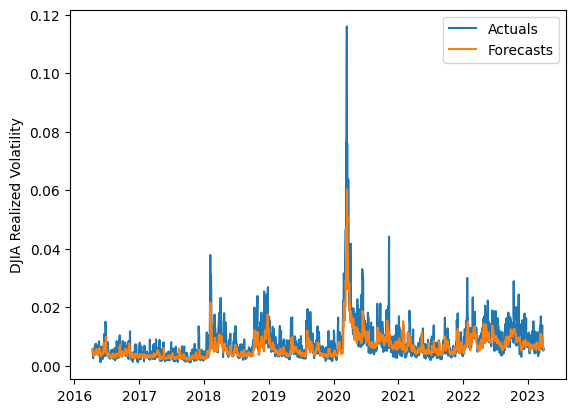

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("DJIA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 126
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(126, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/3)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(1755,1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
124/124 [==============================] - 5s 13ms/step - loss: 0.0029 - accuracy: 0.4539 - mean_absolute_error: 0.0340
Epoch 2/7
124/124 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.3023 - mean_absolute_error: 0.0316
Epoch 3/7
124/124 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.4980 - mean_absolute_error: 0.0303
Epoch 4/7
124/124 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.4024 - mean_absolute_error: 0.0304
Epoch 5/7
124/124 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.4181 - mean_absolute_error: 0.0300
Epoch 6/7
124/124 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.4377 - mean_absolute_error: 0.0301
Epoch 7/7
1/1 [==============================] - 0s 33ms/step


In [ ]:
Accuracy

[55.64009018924253,
 62.693050886937016,
 65.12346092770085,
 59.578459887916644,
 64.1875638962313,
 53.78276125216497,
 64.87990093355678,
 62.144466431188185,
 58.18171456917608,
 48.505700358527335,
 63.247102468188054,
 63.741823449694614,
 64.30971316956798,
 66.08020079187413,
 61.34752704047231]

In [ ]:
RMSE

[0.002800794228804462,
 0.0026064131634499755,
 0.002620099329724433,
 0.0026728625636846114,
 0.0026044020729955003,
 0.002842183987658257,
 0.002641899051787805,
 0.002621464366463189,
 0.0027410402826947918,
 0.003016088829130327,
 0.002637931286996573,
 0.002623869322791172,
 0.002592423614343948,
 0.0026340139107636795,
 0.002678884487219064]

In [ ]:
Quasilikelihood

[0.12306862576968818,
 0.09775924253965591,
 0.09374962466838123,
 0.10926515070190025,
 0.09437323410927875,
 0.12912622665231016,
 0.094358927109617,
 0.09965408787775037,
 0.1126389921748914,
 0.1494794420152113,
 0.0972928620820553,
 0.09562012389372973,
 0.09338925871832024,
 0.09193473005749725,
 0.10275728261517847]

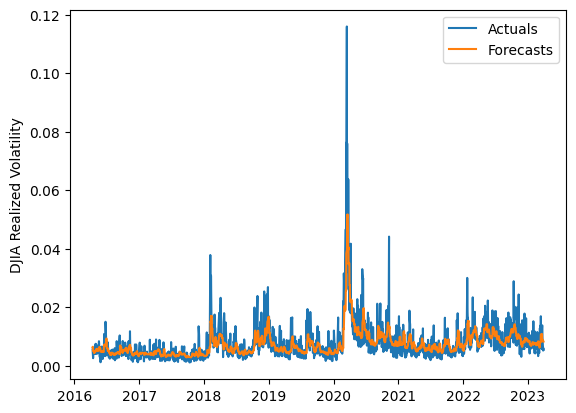

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("DJIA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts


In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 126
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(126, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/5)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(1755,1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
124/124 [==============================] - 26s 188ms/step - loss: 0.0031 - accuracy: 0.1641 - mean_absolute_error: 0.0346
Epoch 2/7
124/124 [==============================] - 24s 190ms/step - loss: 0.0025 - accuracy: 0.1467 - mean_absolute_error: 0.0320
Epoch 3/7
124/124 [==============================] - 21s 172ms/step - loss: 0.0024 - accuracy: 0.3071 - mean_absolute_error: 0.0310
Epoch 4/7
124/124 [==============================] - 24s 191ms/step - loss: 0.0023 - accuracy: 0.2226 - mean_absolute_error: 0.0300
Epoch 5/7
124/124 [==============================] - 25s 200ms/step - loss: 0.0023 - accuracy: 0.2358 - mean_absolute_error: 0.0305
Epoch 6/7
124/124 [==============================] - 22s 175ms/step - loss: 0.0023 - accuracy: 0.2756 - mean_absolute_error: 0.0301
Epoch 7/7
1/1 [==============================] - 0s 44ms/step


In [ ]:
RMSE

[0.0027383969717659972,
 0.0029665262578845056,
 0.002823990274656023,
 0.002709012235721493,
 0.0029054970227228917,
 0.0028557335898425707,
 0.0027941454319284536,
 0.0027179892336422432,
 0.002731096187652856,
 0.0031399407870694473,
 0.0028003727836145116,
 0.002756540603243615,
 0.0027450016565781703,
 0.002708880342731807,
 0.002700340136541744]

In [ ]:
Accuracy

[59.63580110681088,
 50.18514381022965,
 55.38808432701757,
 63.63449855211603,
 53.14747683676394,
 65.48628592999137,
 56.29691482301542,
 63.015911466601196,
 60.122657456571574,
 46.70448890935888,
 57.24597887567477,
 61.99531281132552,
 59.79503519281943,
 60.76620417941897]

In [ ]:
Quasilikelihood

[0.1116685414534564,
 0.14752781924843347,
 0.12741683245523422,
 0.10134680563252077,
 0.13499947604407891,
 0.11325302351057477,
 0.12548326253005576,
 0.102768023581554,
 0.1104652939024916,
 0.16003040368793056,
 0.11903720603805276,
 0.10635884928364335,
 0.1111690413158723,
 0.10816578038502243]

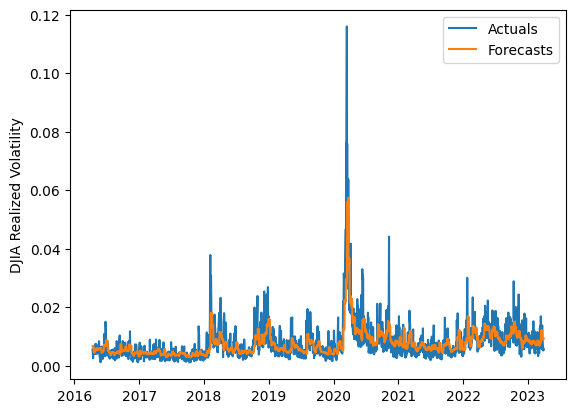

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("DJIA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 126
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(126, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(10))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/10)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(1750,1)
test=test[:1750]
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
124/124 [==============================] - 3s 9ms/step - loss: 0.0031 - accuracy: 0.1041 - mean_absolute_error: 0.0351
Epoch 2/7
124/124 [==============================] - 1s 7ms/step - loss: 0.0025 - accuracy: 0.0265 - mean_absolute_error: 0.0318
Epoch 3/7
124/124 [==============================] - 1s 7ms/step - loss: 0.0024 - accuracy: 0.0267 - mean_absolute_error: 0.0310
Epoch 4/7
124/124 [==============================] - 1s 7ms/step - loss: 0.0024 - accuracy: 0.0252 - mean_absolute_error: 0.0309
Epoch 5/7
124/124 [==============================] - 1s 7ms/step - loss: 0.0023 - accuracy: 0.0318 - mean_absolute_error: 0.0305
Epoch 6/7
124/124 [==============================] - 1s 8ms/step - loss: 0.0023 - accuracy: 0.0237 - mean_absolute_error: 0.0303
Epoch 7/7
1/1 [==============================] - 0s 21ms/step


In [ ]:
RMSE

[0.0029493915449999215,
 0.002949073431501441,
 0.002980011292206836,
 0.0029338823778723437,
 0.00299950821417749,
 0.002983271821428897,
 0.0029398433789883174,
 0.002895582206254595,
 0.0029756303994845274,
 0.0030210999544781967,
 0.00302116865047794,
 0.002958333163671498,
 0.003108272438396136,
 0.003074795937872979,
 0.0029723773168546883]

In [ ]:
Accuracy

[57.334614932785655,
 62.86858943706596,
 60.48613918537886,
 57.97705987237681,
 54.630500912037384,
 57.255035616442655,
 57.94795351316442,
 61.36057017241171,
 56.3442400318434,
 62.604317585535554,
 59.39014088093103,
 56.488360863234234,
 56.29972632363488,
 54.963526185203946,
 55.87681897251673]

In [ ]:
Quasilikelihood

[0.1272251068191795,
 0.11658426840200943,
 0.1219953138187836,
 0.12604708113451096,
 0.13621179689050494,
 0.1279747049781356,
 0.1256227582543543,
 0.11671777777935999,
 0.13089916578333594,
 0.12284262001248296,
 0.1260137215732061,
 0.12964515363169787,
 0.13461748031098764,
 0.13620713316752348,
 0.13209320356722243]

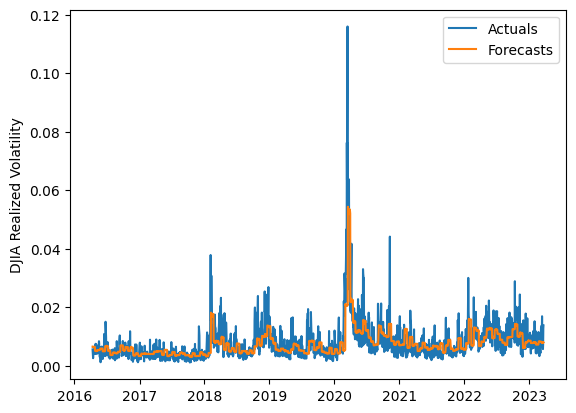

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1750], test)
plt.plot(df_for_date["Date"][:1750], true_predictions) 
plt.ylabel("DJIA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 126
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(126, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(22))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/22)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(1738,1)
test=test[:1738]
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
124/124 [==============================] - 6s 11ms/step - loss: 0.0036 - accuracy: 0.0444 - mean_absolute_error: 0.0372
Epoch 2/7
124/124 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.0391 - mean_absolute_error: 0.0328
Epoch 3/7
124/124 [==============================] - 1s 7ms/step - loss: 0.0026 - accuracy: 0.1631 - mean_absolute_error: 0.0316
Epoch 4/7
124/124 [==============================] - 1s 7ms/step - loss: 0.0024 - accuracy: 0.0366 - mean_absolute_error: 0.0309
Epoch 5/7
124/124 [==============================] - 1s 7ms/step - loss: 0.0023 - accuracy: 0.0426 - mean_absolute_error: 0.0306
Epoch 6/7
124/124 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.0676 - mean_absolute_error: 0.0297
Epoch 7/7
1/1 [==============================] - 0s 21ms/step


In [ ]:
RMSE

[0.00338634629016469,
 0.0035050143086765295,
 0.003363845891973841,
 0.003455377750816462,
 0.0034388094052877267,
 0.0033741448661494355,
 0.0034024538296685974,
 0.003638736319815189,
 0.003852690663436039,
 0.003986132355568375,
 0.0034646406138967513,
 0.0036519931089849336,
 0.0032798724675125526,
 0.0035630059560499173,
 0.003654746859757802]

In [ ]:
Accuracy

[51.67159018143253,
 47.261576780077995,
 53.44154983236822,
 53.35900746346978,
 51.699776060332056,
 59.323640329177564,
 57.329847541057156,
 47.099021032166924,
 40.07687960622196,
 33.27703906192367,
 51.47459945036586,
 47.04615410767975,
 62.256686572922305,
 48.335045012717096,
 46.08491205990174]

In [ ]:
Quasilikelihood

[0.15365124003169295,
 0.16941336511963473,
 0.14829477446848438,
 0.1498503702610341,
 0.15443484096083518,
 0.13941920413341546,
 0.14119916317291176,
 0.1722505336715026,
 0.2003254600560852,
 0.22971786961097568,
 0.1558507800767256,
 0.17246209991143358,
 0.13406768228236557,
 0.16626067600645322,
 0.17593156953043115]

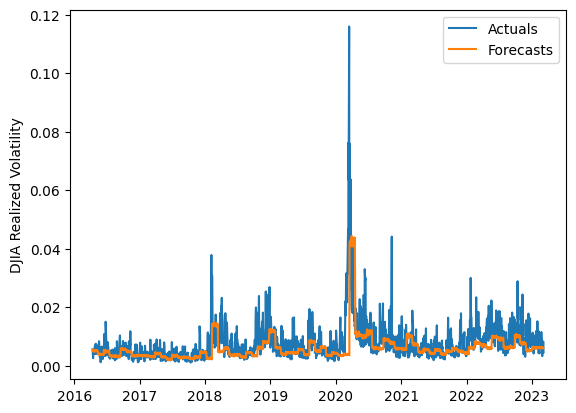

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1738], test)
plt.plot(df_for_date["Date"][:1738], true_predictions) 
plt.ylabel("DJIA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])